In [41]:
import matplotlib.pyplot as plt
import pandas as pd

#Загрузка данных с обработкой возможных проблем
df_fl = pd.read_csv("flights.csv", low_memory=False)
df_airports = pd.read_csv("airports.csv", low_memory=False)
df_airlines = pd.read_csv("airlines.csv", low_memory=False)

In [42]:
df_fl = df_fl[df_fl['DEPARTURE_DELAY'] >= 0]
df_fl = df_fl.dropna(subset='DEPARTURE_DELAY')

In [35]:
df_fl.isna().any(axis=0)

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER            False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME         False
DEPARTURE_DELAY        False
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

1. Хотим посмотреть, как задержки рейсов варьируются в зависимости от месяца. Это поможет выявить сезонные колебания в задержках, что может быть связано с различными факторами: погодными условиями, повышенной нагрузкой на авиаперевозки или изменениями в расписаниях. Мы проанализируем среднее значение задержек для каждого месяца и выявим, существуют ли какие-либо месяцы, когда задержки особенно высоки.

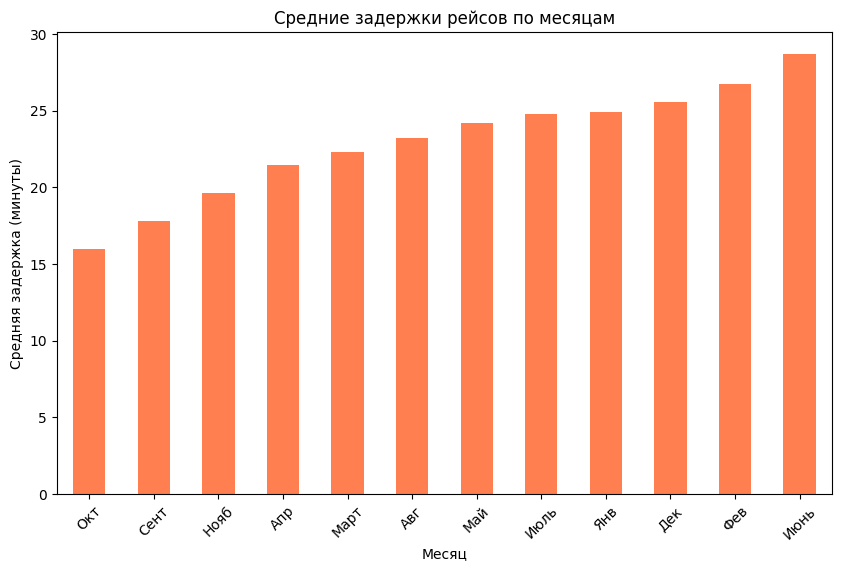

In [44]:
#Добавляем месяц для анализа
df_fl['MONTH'] = df_fl['MONTH'].map({
    1: 'Янв',
    2: 'Фев',
    3: 'Март',
    4: 'Апр',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Авг',
    9: 'Сент',
    10: 'Окт',
    11: 'Нояб',
    12: 'Дек'
})

#Рассчитываем средние задержки по месяцам
func = df_fl.groupby('MONTH')['ARRIVAL_DELAY'].mean().sort_values()

#Картиночка
plt.figure(figsize=(10, 6))
func.plot(kind='bar', color='coral')
plt.title("Средние задержки рейсов по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Средняя задержка (минуты)")
plt.xticks(rotation=45)
plt.show()


Как показано на графике, средние задержки значительно выше в летние месяцы, особенно в июне. Это может быть связано с сезонным увеличением числа пассажиров, которые идут в отпуск и путешествуют, а также студентов, которые летят домой после окончания учебного года. Еще можем видеть большое количество задержек зимой, которое происходит из-за увеличения числа пассажиров вледствие многочисленных отпусков на фоне холодного времени года. Чтобы снизить нагрузку в эти периоды, возможно, стоит увеличить количество рейсов в летние и зимние месяцы или улучшить инфраструктуру для обработки большего количества пассажиров.

2. Задержки рейсов могут варьироваться в зависимости от авиакомпании. Каждая авиакомпания имеет свои стандарты работы, организацию логистики и способы реагирования на непредвиденные ситуации. Поэтому мы хотим исследовать средние задержки по авиакомпаниям, чтобы выявить, какие авиакомпании чаще всего сталкиваются с проблемами задержек.

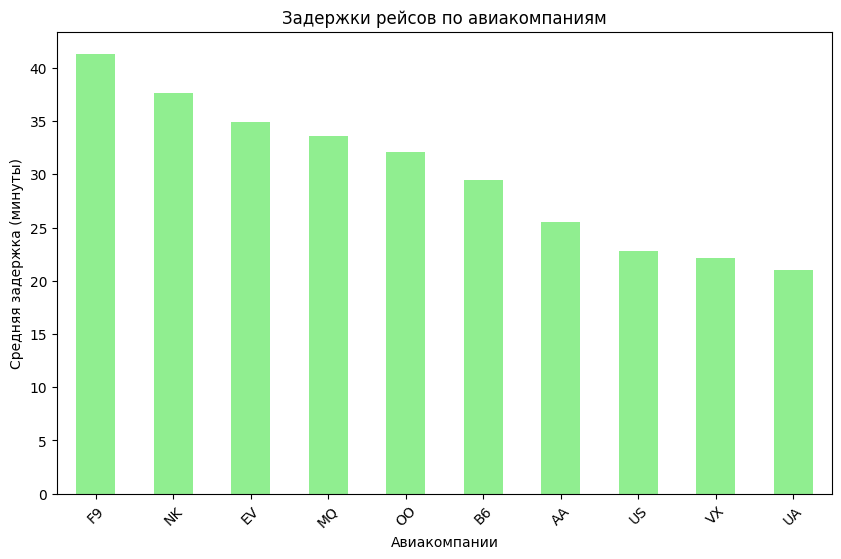

In [75]:
#Группируем по авиакомпании и рассчитываем среднюю задержку
func = df_fl.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).head(10)

#Картиночка
plt.figure(figsize=(10, 6))
func.plot(kind='bar', color='lightgreen')
plt.title("Задержки рейсов по авиакомпаниям")
plt.xlabel("Авиакомпании")
plt.ylabel("Средняя задержка (минуты)")
plt.xticks(rotation=45)
plt.show()


График показывает, что некоторые авиакомпании, а именно Spirit Air Lines (NK), Frontier Airlines (F9) имеют значительно большие средние задержки по сравнению с другими. Это может указывать на проблемы с управлением рейсами, недостаточную подготовленность к сезонным нагрузкам или технические проблемы. Рекомендуется провести более тщательный анализ процессов в этих авиакомпаниях для устранения причин задержек и улучшения качества обслуживания пассажиров.

3. Отмены рейсов — это еще одна важная проблема, влияющая на качество обслуживания пассажиров. Хотим проанализировать процент отмененных рейсов по каждой авиакомпании. 

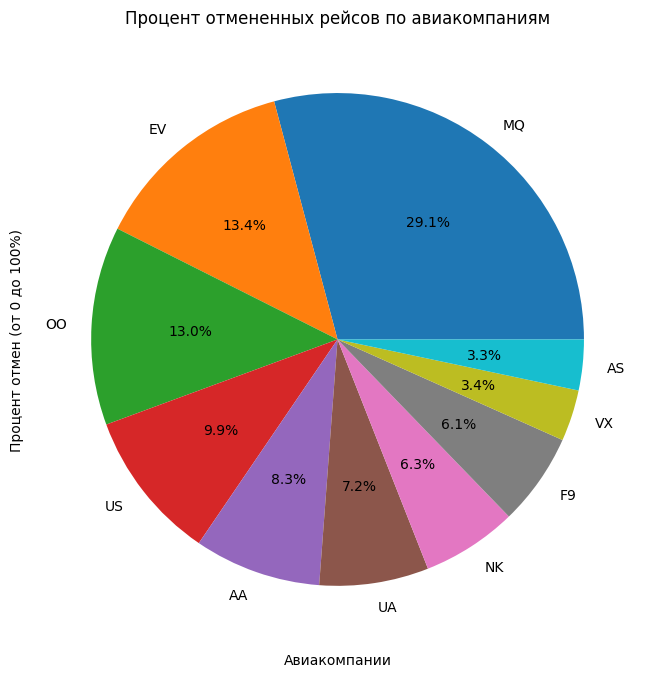

In [76]:
#Рассчитываем процент отмененных рейсов по авиакомпаниям
func = df_fl.groupby('AIRLINE')['CANCELLED'].mean().sort_values(ascending=False).head(10)

#Картиночка
plt.figure(figsize=(12, 6))
func.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Процент отмененных рейсов по авиакомпаниям")
plt.xlabel("Авиакомпании")
plt.ylabel("Процент отмен (от 0 до 100%)")
plt.xticks(rotation=45)
plt.show()


На графике видно, что авиакомпания American Eagle Airlines (MQ) демонстрирует значительно более высокий процент отмененных рейсов по сравнению с другими авиакомпаниями. Нужно проверить, возможно, компания сталкивается с нехваткой ресурсов, такими как экипажи или воздушные судна, что приводит к большему числу отмен. Также высокий процент отмен может быть результатом плохого планирования или недостаточной гибкости расписания, что приводит к задержкам и отменам рейсов в последние моменты.
Рекомендуется более детально исследовать операционные процессы компании American Eagle Airlines, чтобы понять, какие факторы приводят к большому количеству отмененных рейсов. 

4. Диверсия рейса, или перенаправление в другой аэропорт, тоже является частой проблемой. В этом разделе мы исследуем процент рейсов, которые были перенаправлены в другие аэропорты. Это поможет понять, есть ли аэропорты, которые чаще сталкиваются с такими ситуациями, и какие факторы могут этому способствовать.

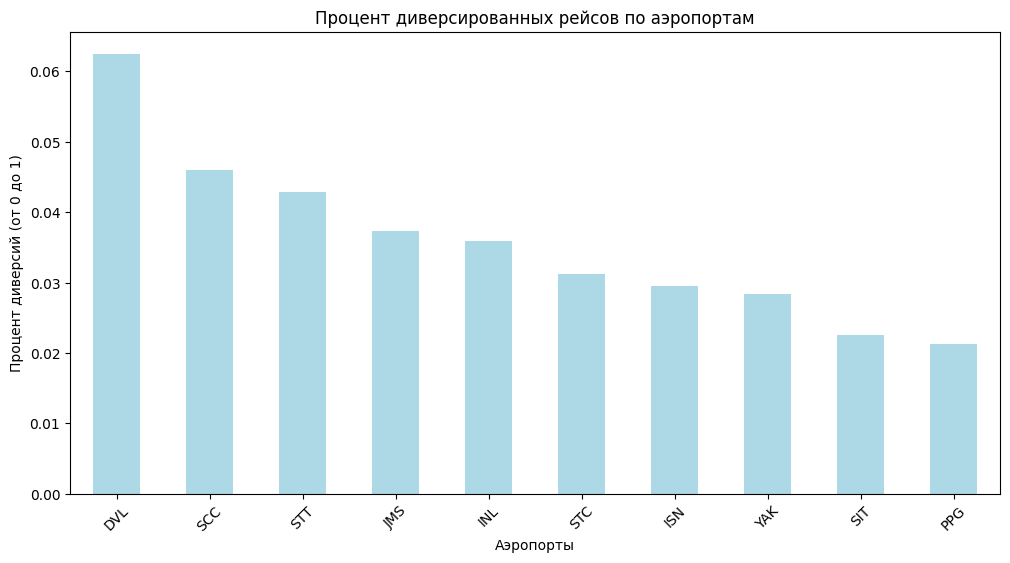

In [77]:
#Рассчитываем процент диверсий рейсов по аэропортам
func = df_fl.groupby('ORIGIN_AIRPORT')['DIVERTED'].mean().sort_values(ascending=False).head(10)

#Картиночка
plt.figure(figsize=(12, 6))
func.plot(kind='bar', color='lightblue')
plt.title("Процент диверсированных рейсов по аэропортам")
plt.xlabel("Аэропорты")
plt.ylabel("Процент диверсий (от 0 до 1)")
plt.xticks(rotation=45)
plt.show()


График показывает, что в некоторых аэропортах, таких как Cyril E. King Airport (STT), Devils Lake Regional Airport (DVL) и Deadhorse Airport (SCC) диверсий значительно выше, чем в других. Это может указывать на проблемы с перегрузкой или нехваткой инфраструктуры, которая может оказывать влияние на перенаправление рейсов. Рекомендуется обратить внимание на эти аэропорты, чтобы выявить и устранить причины, вызывающие такие проблемы.

5. Задержки рейсов могут зависеть от времени суток. Мы хотим проанализировать средние задержки рейсов в зависимости от времени суток и выявить, в какие периоды дня задержки наиболее выражены.

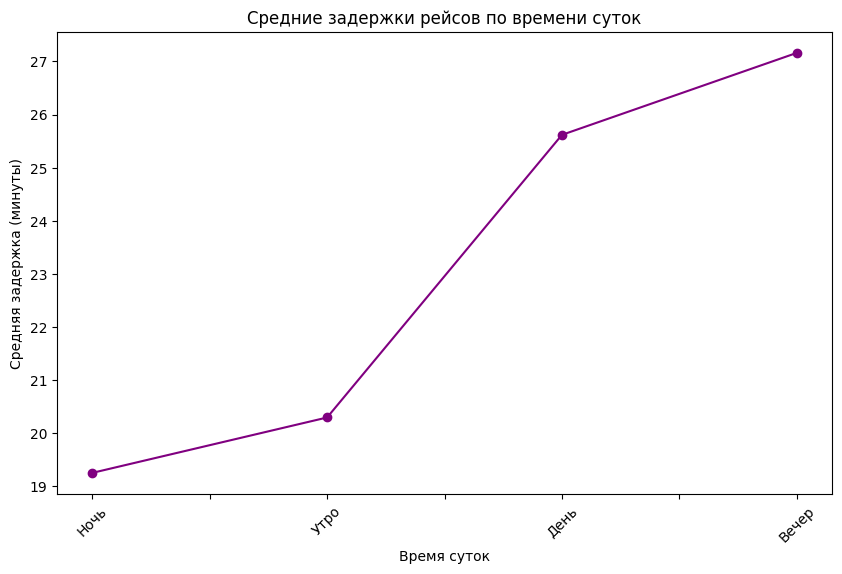

In [78]:
#Добавляем колонку для времени суток
df_fl['DEPARTURE_HOUR'] = df_fl['SCHEDULED_DEPARTURE'] // 100  #получаем час из времени в формате HHMM
df_fl['TIME_OF_DAY'] = pd.cut(df_fl['DEPARTURE_HOUR'], bins=[0, 6, 12, 18, 24], labels=["Ночь", "Утро", "День", "Вечер"])

#Рассчитываем среднюю задержку по времени суток
func = df_fl.groupby('TIME_OF_DAY', observed=True)['ARRIVAL_DELAY'].mean()

#Картиночка
plt.figure(figsize=(10, 6))
func.plot(kind='line', color='purple', marker='o')
plt.title("Средние задержки рейсов по времени суток")
plt.xlabel("Время суток")
plt.ylabel("Средняя задержка (минуты)")
plt.xticks(rotation=45)
plt.show()


Как показано на графике, средние задержки рейсов значительно выше в вечернее время. Это может быть связано с пиковыми часами (после рабочего дня), когда количество рейсов увеличивается, и аэропорты могут не справляться с возросшей нагрузкой. Чтобы уменьшить задержки в это время, можно рассмотреть возможность оптимизации расписания рейсов или улучшения логистики в вечерние часы.